In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.datasets import fetch_california_housing
import warnings
warnings.filterwarnings("ignore")


## Problem statement

In [ ]:
#To predict house price using various variables

## Data Gathering

In [3]:
california = fetch_california_housing()
dir(california)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [5]:
df = pd.DataFrame(california.data,columns = california.feature_names)
df["Target"] = california.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [6]:
df['Target'].value_counts()

5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
3.59200      1
0.54900      1
3.77600      1
0.81200      1
0.47000      1
Name: Target, Length: 3842, dtype: int64

In [7]:
df.to_csv("California_Dataset.csv")

## Exploratort Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


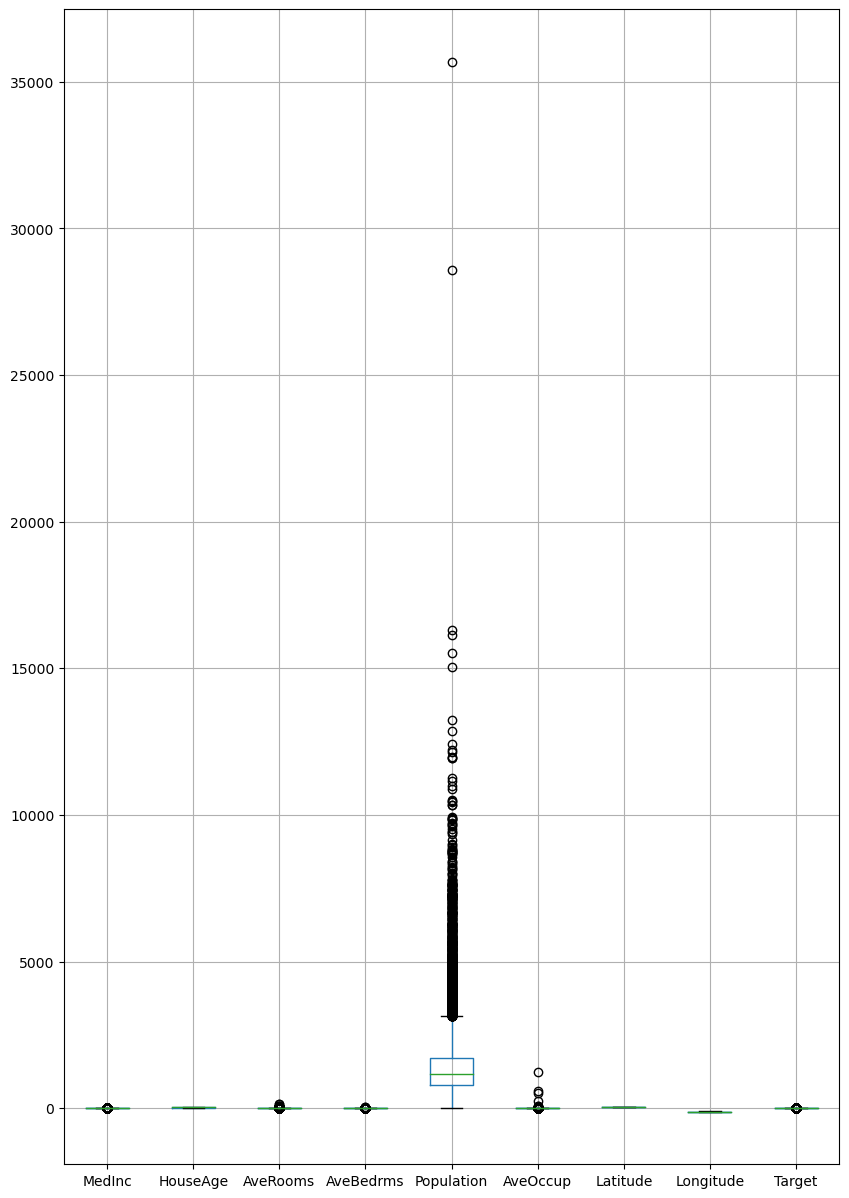

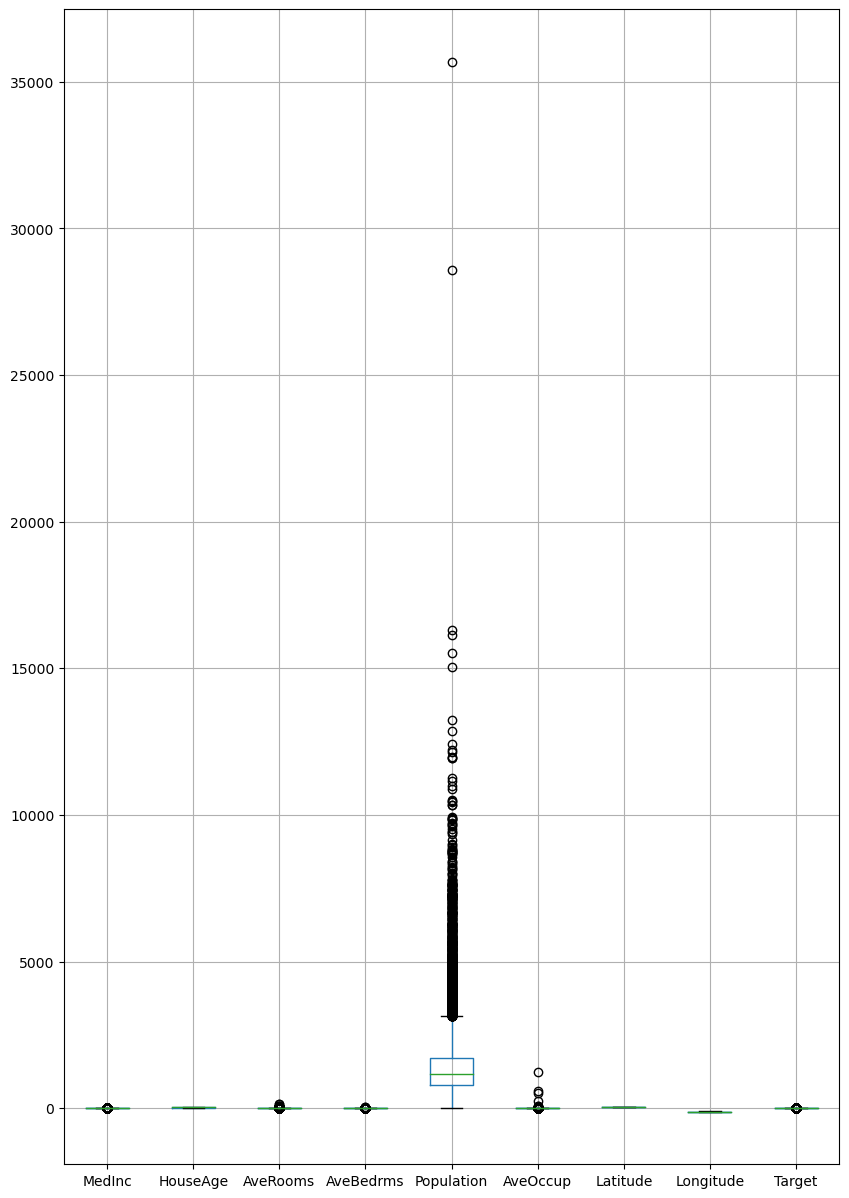

In [12]:
plt.figure(figsize = (10,15))
df.boxplot()
plt.show()

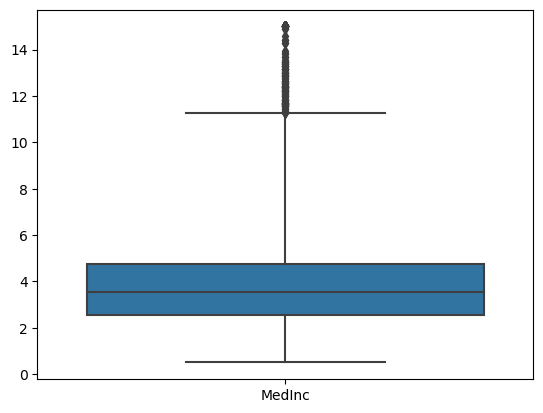

In [24]:
sns.boxplot(df[['MedInc']],whis = 3)
plt.show()

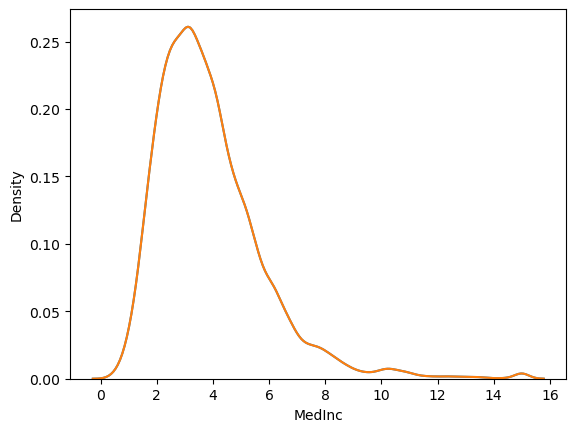

In [16]:
sns.kdeplot(df['MedInc'])
plt.show()

In [17]:
df['MedInc'].skew()


1.6466567021344465

In [25]:
q1 = df['MedInc'].quantile(0.25)
q3 = df['MedInc'].quantile(0.75)

iqr = q3 - q1
print("IQR >>",iqr)

Lower_tail = q1 - 3 * iqr
Upper_tail = q3 + 3 * iqr

print("Lower Tail :",Lower_tail)
print("Upper Tail :",Upper_tail)

IQR >> 2.17985
Lower Tail : -3.9761500000000005
Upper Tail : 11.2828


In [27]:
df.loc[df['MedInc'] > Upper_tail]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
131,11.6017,18.0,8.335052,1.082474,533.0,2.747423,37.84,-122.19,3.92600
510,11.8603,39.0,7.911111,0.984127,808.0,2.565079,37.82,-122.22,5.00001
511,13.4990,42.0,8.928358,1.000000,1018.0,3.038806,37.82,-122.22,5.00001
512,12.2138,52.0,9.210227,1.039773,1001.0,2.843750,37.82,-122.23,5.00001
514,12.3804,52.0,9.122715,1.033943,1192.0,3.112272,37.82,-122.23,5.00001
...,...,...,...,...,...,...,...,...,...
18366,11.3283,21.0,6.100000,0.900000,182.0,2.600000,37.24,-122.08,5.00001
18501,15.0001,52.0,8.461538,1.230769,55.0,2.115385,37.19,-121.59,1.31300
18504,15.0001,26.0,12.500000,1.250000,17.0,4.250000,37.13,-121.96,4.00000
20163,12.6320,5.0,7.462963,0.888889,208.0,3.851852,34.44,-119.31,5.00001


In [26]:
np.where(df['MedInc'] > Upper_tail)

(array([  131,   510,   511,   512,   514,  1564,  1566,  1583,  1586,
         1617,  1621,  1645,  1646,  4042,  4046,  4047,  4116,  4220,
         4229,  4345,  4352,  4604,  4605,  4606,  4626,  4678,  5242,
         5243,  5244,  5247,  5248,  5250,  5253,  5256,  5257,  5258,
         5259,  5260,  5264,  5269,  5272,  5275,  5281,  5291,  5304,
         5352,  5494,  5728,  6391,  6399,  6590,  6591,  6592,  6712,
         6724,  6726,  6727,  6731,  6735,  6736,  8792,  8794,  8795,
         8805,  8816,  8846,  8847,  8848,  8849,  8850,  8851,  8852,
         8853,  8854,  8875,  8876,  8878,  8882,  9316,  9370,  9381,
         9418,  9811, 10155, 10458, 10483, 10517, 10673, 10727, 10749,
        10760, 11000, 11007, 11037, 11490, 11520, 11912, 14459, 14486,
        15231, 15241, 15693, 15698, 16171, 16828, 16908, 16910, 16911,
        16912, 16913, 16915, 17107, 17108, 17110, 17111, 17113, 17118,
        17158, 17161, 17162, 17166, 17170, 17310, 17798, 17858, 18052,
      

In [28]:
df['MedInc'] = np.where(df['MedInc'] > Upper_tail, Upper_tail,df['MedInc'])

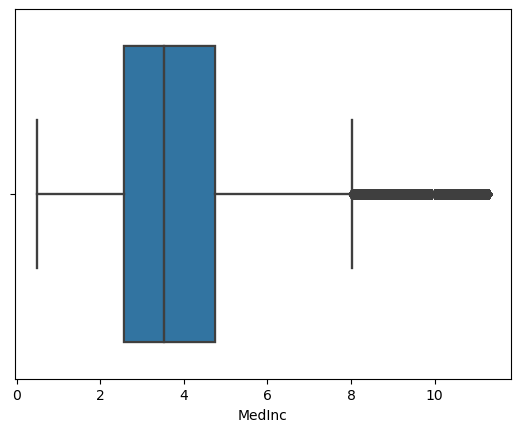

In [32]:
sns.boxplot(x = df['MedInc'])
plt.show()

In [33]:
np.where(df['MedInc'] > Upper_tail)

(array([], dtype=int64),)

In [34]:
df['Population'].value_counts()

891.0     25
761.0     24
1227.0    24
1052.0    24
850.0     24
          ..
2141.0     1
5546.0     1
3186.0     1
3590.0     1
6912.0     1
Name: Population, Length: 3888, dtype: int64

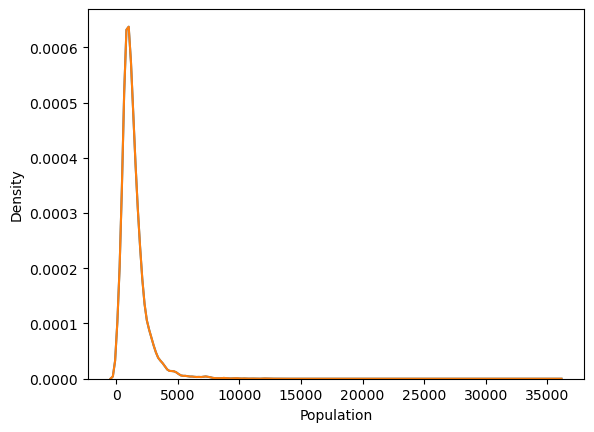

In [36]:
sns.kdeplot(df['Population'])
plt.show()

In [37]:
df['Population'].skew()

4.93585822672712

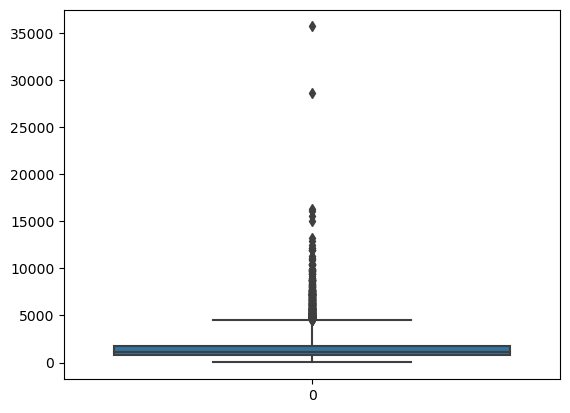

In [41]:
sns.boxplot(df['Population'],whis = 3)
plt.show()

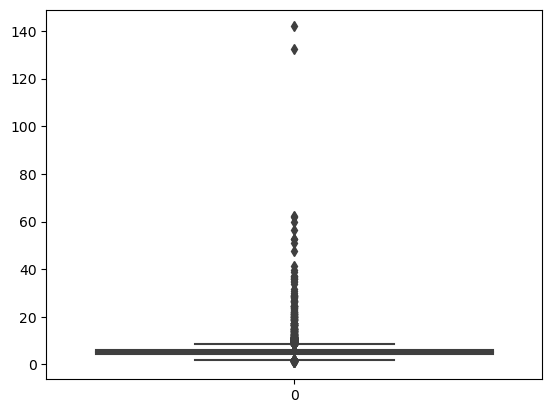

In [42]:
sns.boxplot(df['AveRooms'])
plt.show()

### Here we have to check assumption 


### 1.Linearity

In [43]:
df.corr()  #covariance matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.127776,0.328932,-0.063691,0.009121,0.019448,-0.081390,-0.015480,0.694964
HouseAge,-0.127776,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.328932,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.063691,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.009121,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.019448,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.081390,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015480,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target,0.694964,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


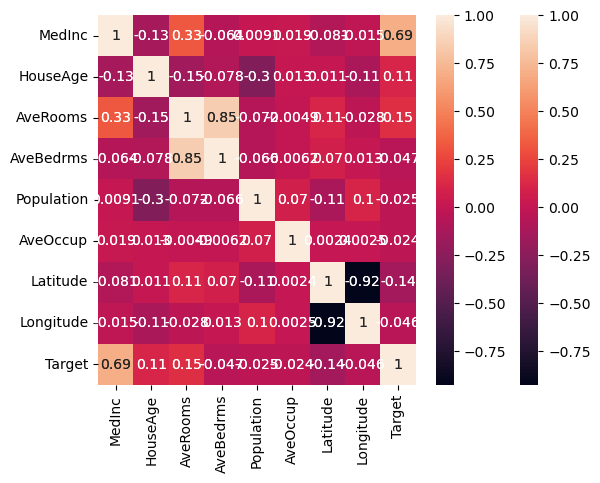

In [45]:
sns.heatmap(df.corr(),annot = True)
plt.show()

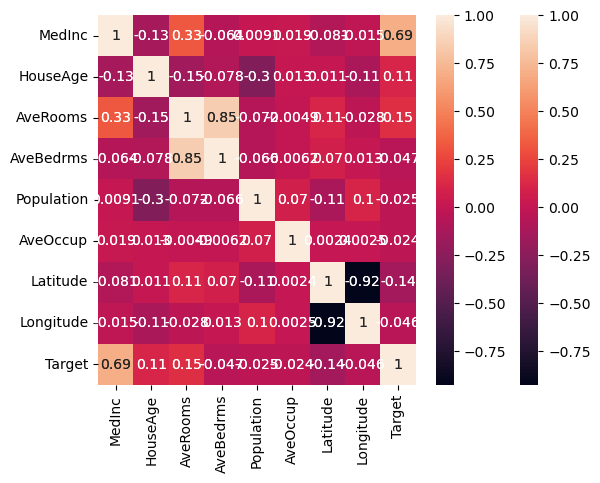

In [47]:
sns.heatmap(df.corr(),annot = True)
plt.savefig("correlation2.png")
plt.show()

In [48]:
corr2 = df.corr().tail(1)
corr2

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
Target,0.694964,0.105623,0.151948,-0.046701,-0.02465,-0.023737,-0.14416,-0.045967,1.0


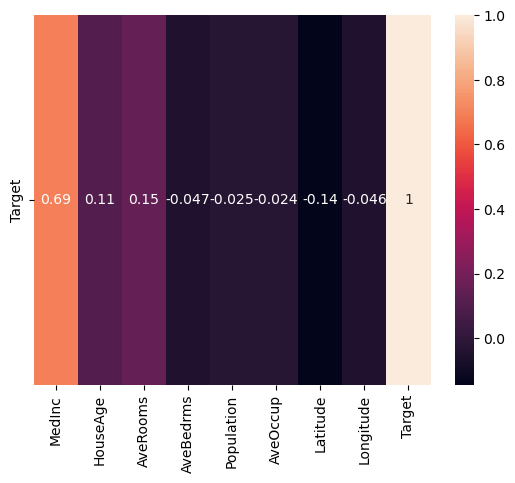

In [49]:
sns.heatmap(corr2,annot=True)
plt.savefig("corr2.Target.png")
plt.show()

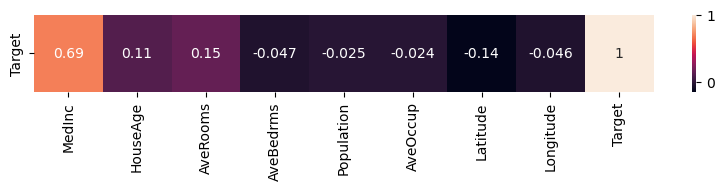

In [50]:
plt.figure(figsize=(10,1))
sns.heatmap(corr2,annot=True)
plt.savefig("corr2.Target.png")
plt.show()

## 2. No multicolinearity

In [51]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

In [52]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [53]:
x = df.drop('Target',axis = 1)
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [54]:
y = df["Target"]
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Target, Length: 20640, dtype: float64

In [55]:
x.to_numpy()

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [56]:
x.shape[1]

8

In [57]:
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    print(f"Vif is >>",vif)

Vif is >> 12.479572419756419
Vif is >> 7.200612365433916
Vif is >> 46.996359721815246
Vif is >> 44.49659463160932
Vif is >> 2.9356974125292346
Vif is >> 1.0953282249481209
Vif is >> 562.8264427557858
Vif is >> 641.1848280535377


In [58]:
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    print(f"vif is {x.columns[i]}>>",vif)

vif is MedInc>> 12.479572419756419
vif is HouseAge>> 7.200612365433916
vif is AveRooms>> 46.996359721815246
vif is AveBedrms>> 44.49659463160932
vif is Population>> 2.9356974125292346
vif is AveOccup>> 1.0953282249481209
vif is Latitude>> 562.8264427557858
vif is Longitude>> 641.1848280535377


In [59]:
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    print(f"vif is {x.columns[i]}>>",vif)
    vif_list.append(vif)

vif is MedInc>> 12.479572419756419
vif is HouseAge>> 7.200612365433916
vif is AveRooms>> 46.996359721815246
vif is AveBedrms>> 44.49659463160932
vif is Population>> 2.9356974125292346
vif is AveOccup>> 1.0953282249481209
vif is Latitude>> 562.8264427557858
vif is Longitude>> 641.1848280535377


In [60]:
vif_list

[12.479572419756419,
 7.200612365433916,
 46.996359721815246,
 44.49659463160932,
 2.9356974125292346,
 1.0953282249481209,
 562.8264427557858,
 641.1848280535377]

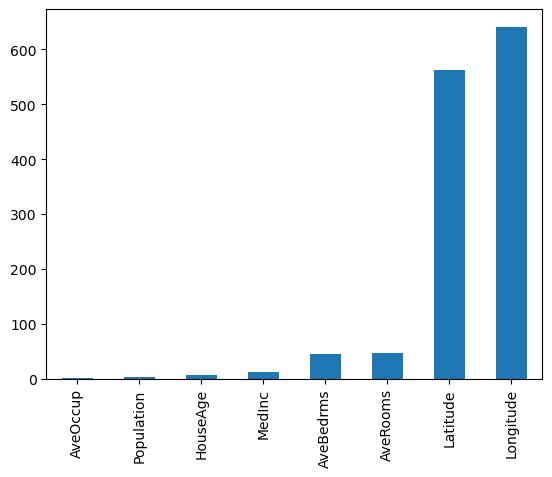

In [61]:
s1 = pd.Series(vif_list,index = x.columns)
s1.sort_values().plot(kind = "bar")
plt.show()

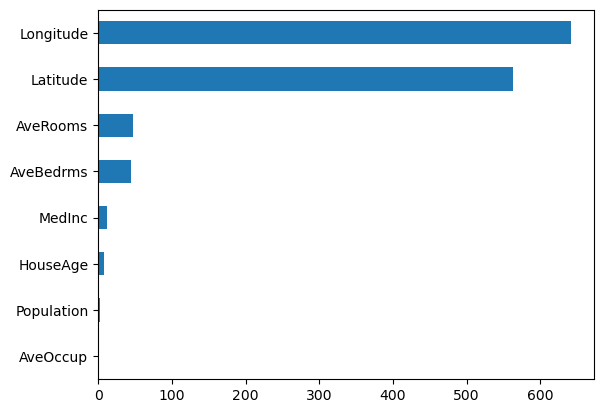

In [62]:
s1 = pd.Series(vif_list,index = x.columns)
s1.sort_values().plot(kind = "barh")
plt.show()

## Model Training

In [63]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [64]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Target, Length: 20640, dtype: float64

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)


In [66]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
15961,3.1908,52.0,5.000000,1.014184,879.0,3.117021,37.71,-122.43
1771,3.6094,42.0,4.900990,0.957096,971.0,3.204620,37.95,-122.35
16414,2.6250,16.0,8.333333,1.666667,20.0,3.333333,37.90,-121.24
5056,1.5143,34.0,3.805981,1.149526,3538.0,2.580598,34.02,-118.35
8589,7.3356,38.0,5.894904,1.057325,750.0,2.388535,33.89,-118.39
...,...,...,...,...,...,...,...,...
10955,1.7823,17.0,4.055046,1.087156,1079.0,2.474771,33.76,-117.88
17289,8.5608,42.0,6.788462,1.011538,753.0,2.896154,34.42,-119.63
5192,1.1326,42.0,4.890785,1.006826,775.0,2.645051,33.93,-118.26
12172,2.6322,10.0,4.991614,0.951782,1323.0,2.773585,33.73,-117.16


In [67]:
y_train

15961    2.55600
1771     1.14600
16414    1.37500
5056     1.18800
8589     4.22700
          ...   
10955    2.05300
17289    5.00001
5192     1.04800
12172    1.40700
235      1.26000
Name: Target, Length: 16512, dtype: float64

In [68]:
x_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4712,3.2500,39.0,4.503205,1.073718,1109.0,1.777244,34.06,-118.36
2151,1.9784,37.0,4.988584,1.038813,1143.0,2.609589,36.78,-119.78
15927,4.0132,46.0,4.480296,1.012315,1534.0,3.778325,37.73,-122.42
82,1.5208,52.0,3.908046,1.114943,200.0,2.298851,37.81,-122.28
8161,5.1795,37.0,5.406360,1.024735,711.0,2.512367,33.82,-118.13
...,...,...,...,...,...,...,...,...
2319,2.3173,25.0,4.915289,1.115702,1482.0,3.061983,36.82,-119.70
5341,2.1875,49.0,4.571429,1.000000,14.0,2.000000,34.04,-118.44
16888,5.0480,26.0,5.000000,1.000000,11.0,3.666667,37.60,-122.37
6823,4.8750,42.0,5.347985,1.058608,829.0,3.036630,34.09,-118.10


In [69]:
y_test

4712     3.550
2151     0.707
15927    2.294
82       1.125
8161     2.254
         ...  
2319     0.682
5341     2.250
16888    3.500
6823     2.273
11878    1.417
Name: Target, Length: 4128, dtype: float64

In [70]:
linear_reg = LinearRegression()
linear_reg

LinearRegression()

In [71]:
linear_reg.fit(x_train,y_train)

LinearRegression()

In [72]:
linear_reg.coef_

array([ 4.71141042e-01,  1.04695562e-02, -1.24405611e-01,  7.20283583e-01,
       -4.12395589e-06, -3.58419398e-03, -4.06978046e-01, -4.21927157e-01])

In [73]:
linear_reg.intercept_

-36.09027886380903

## Model Evaluation

In [74]:
y_pred = linear_reg.predict(x_test)
y_pred[0:10] #y_predicted values

array([2.12908222, 0.91254741, 2.73105658, 1.68388981, 2.86920853,
       3.6044882 , 2.98348295, 1.59854612, 1.74465934, 2.01760294])

In [75]:
len(y_pred)

4128

In [76]:
y_test[0:10]

4712     3.550
2151     0.707
15927    2.294
82       1.125
8161     2.254
6636     2.630
17333    2.268
19081    1.662
13298    1.180
7157     1.563
Name: Target, dtype: float64

## Evaluation on testing data`

In [77]:
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error :",mse)
print()

rmse = np.sqrt(mse)
print("Root mean squared error :",rmse)
print()

mae = mean_absolute_error(y_test,y_pred)
print("mean Absolute Error :",mae)
print()

r_squared = r2_score(y_test,y_pred)
print("R squared value :",r_squared)
print()

Mean Squared Error : 0.5066970435929417

Root mean squared error : 0.7118265544308822

mean Absolute Error : 0.5230796006670188

R squared value : 0.6137069599288745



## Evaluation on training data

In [78]:
y_pred_train = linear_reg.predict(x_train)
y_pred_train 

array([2.36052994, 2.29212908, 1.19568924, ..., 1.07547997, 1.0093414 ,
       1.80074094])

In [79]:
y_train  #actual

15961    2.55600
1771     1.14600
16414    1.37500
5056     1.18800
8589     4.22700
          ...   
10955    2.05300
17289    5.00001
5192     1.04800
12172    1.40700
235      1.26000
Name: Target, Length: 16512, dtype: float64

In [80]:
mse = mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error :",mse)
print()

rmse = np.sqrt(mse)
print("Root mean squared error :",rmse)
print()

mae = mean_absolute_error(y_train,y_pred_train)
print("mean Absolute Error :",mae)
print()

r_squared = r2_score(y_train,y_pred_train)
print("R squared value :",r_squared)
print()

Mean Squared Error : 0.5106658904771892

Root mean squared error : 0.7146089073592556

mean Absolute Error : 0.5244505766307012

R squared value : 0.6178018489992533



In [81]:
a = x_train.iloc[10]
a

MedInc          3.072600
HouseAge       52.000000
AveRooms        5.233831
AveBedrms       1.189055
Population    381.000000
AveOccup        1.895522
Latitude       32.750000
Longitude    -117.170000
Name: 14015, dtype: float64

In [82]:
y_predict_a = linear_reg.predict([a])
y_predict_a

array([2.20741351])

## Normality

In [83]:
residual = y_train - y_pred_train
residual

15961    0.195470
1771    -1.146129
16414    0.179311
5056    -0.211480
8589     0.287303
           ...   
10955    0.863117
17289    0.279676
5192    -0.027480
12172    0.397659
235     -0.540741
Name: Target, Length: 16512, dtype: float64

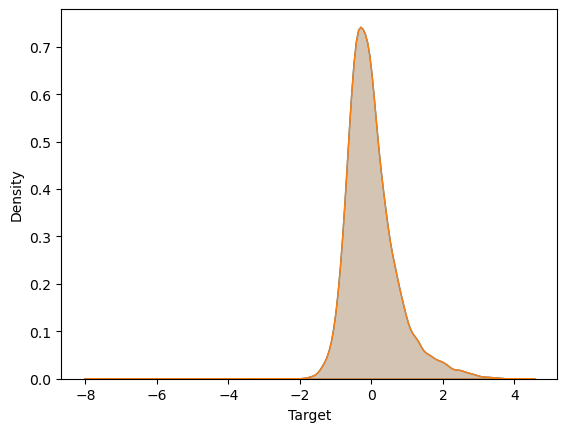

In [85]:
sns.kdeplot(residual,fill = True)
plt.show()

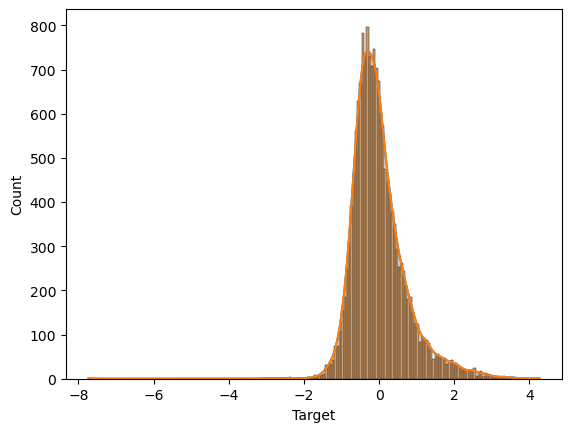

In [87]:
sns.histplot(residual,fill = True, kde = True)
plt.show()

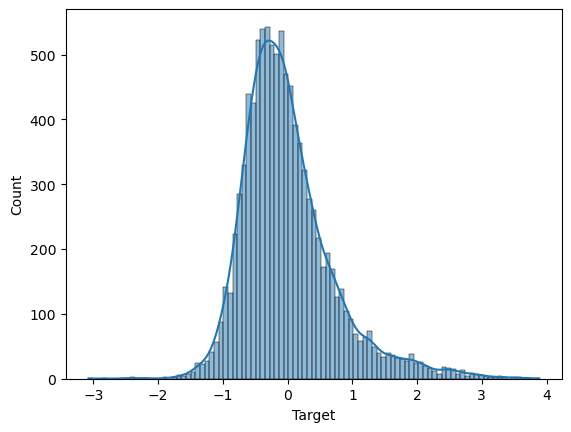

In [88]:
sns.histplot(residual[0:10000],fill = True, kde = True)
plt.show()

## QQ plot

In [89]:
import statsmodels.api as sm

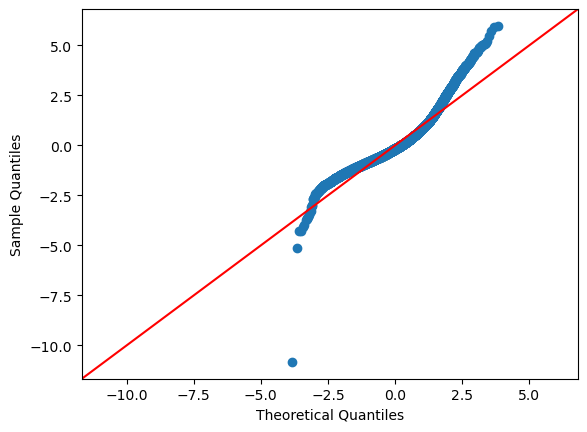

In [90]:
sm.qqplot(residual,line="45",fit=True)

In [91]:
residual.skew()

1.1549539520376264

# Regularization

In [92]:
linear_reg.coef_

array([ 4.71141042e-01,  1.04695562e-02, -1.24405611e-01,  7.20283583e-01,
       -4.12395589e-06, -3.58419398e-03, -4.06978046e-01, -4.21927157e-01])

In [93]:
s1 = pd.Series(linear_reg.coef_,index = x.columns)
s1

MedInc        0.471141
HouseAge      0.010470
AveRooms     -0.124406
AveBedrms     0.720284
Population   -0.000004
AveOccup     -0.003584
Latitude     -0.406978
Longitude    -0.421927
dtype: float64

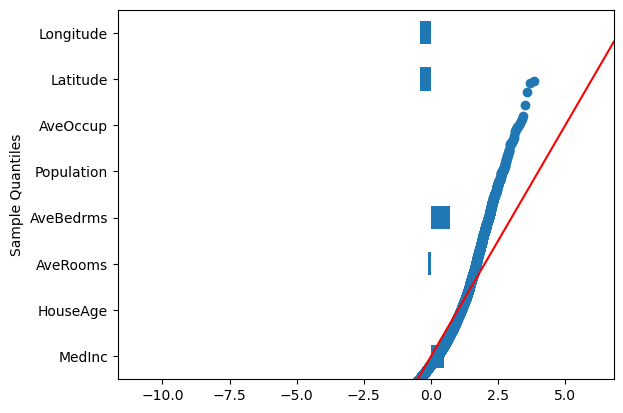

In [95]:
s1.plot(kind='barh')
plt.show()

In [98]:
import pickle
with open("linear_reg_model.pkl","wb") as f:
    pickle.dump(linear_reg,f)

## Testing on Single Row

In [99]:
x.head(1).T

,0
MedInc,8.325200
HouseAge,41.000000
AveRooms,6.984127
AveBedrms,1.023810
Population,322.000000
AveOccup,2.555556
Latitude,37.880000
Longitude,-122.230000


In [100]:
MedInc = 8.325200
HouseAge = 41.000000
AveRooms = 6.984127
AveBedrms = 1.023810
Population = 322.000000
AveOccup = 2.555556
Latitude = 37.880000
Longitude = -122.230000

#charges = ?

In [101]:
test_array = np.zeros(len(x_train.columns))
test_array

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [102]:
x.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [108]:
test_array = np.array([[MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup,
       Latitude, Longitude]])

In [109]:
test_array

array([[ 7.325200e+00,  4.000000e+01,  7.984127e+00,  2.381000e-02,
         3.200000e+02,  1.555556e+00,  3.588000e+01, -1.152300e+02]])

In [106]:
linear_reg.predict(test_array)

array([4.27522577])

In [107]:
MedInc = 7.325200
HouseAge = 40.000000
AveRooms = 7.984127
AveBedrms = 0.023810
Population = 320.000000
AveOccup = 1.555556
Latitude = 35.880000
Longitude = -115.230000

#charges = ?

In [112]:
linear_reg.predict(test_array)[0]

0.8129844138699696

In [113]:
project_data = {"columns": list(x.columns)}
project_data

{'columns': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude']}

In [115]:
import json

In [116]:
with open('projetc_data2.json','w') as f:
    json.dump(project_data,f)

In [119]:
import os
os.getcwd()

'D:\\Machine Learning\\practce on datasets\\Practice_on_california_data_set-02'